In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
train_data = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
test_data = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv', header=None)
training_labels = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv', header=None)


In [4]:
print("Shape: ")
print(f"train_data: {train_data.shape}")
print(f"test_data: {test_data.shape}")
print(f"training_labels: {training_labels.shape}")

Shape: 
train_data: (1000, 40)
test_data: (9000, 40)
training_labels: (1000, 1)


In [5]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [6]:
training_labels.head()

,0
0,1
1,0
2,0
3,1
4,0


In [7]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [9]:
train_data.describe()
y = np.ravel(training_labels)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.33, shuffle=True, random_state=42)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 40) (670,)
(330, 40) (330,)


In [12]:
#Logistic regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = pd.Series(lr.predict(X_test)) # Series used for storing predictions in array 
lr_acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression accuracy: {lr_acc}")

Logistic Regression accuracy: 0.8303030303030303


In [13]:
knn_acc = 0 #max accuracy
mx_n = 0 #max_accuracy n_neighbors

n_arr = [] #list for n_neight
n_score = [] # list for accuracities

for n_neigh in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    knn.fit(X_train, y_train)
    y_pred = pd.Series(knn.predict(X_test))
    n_acc = accuracy_score(y_test, y_pred)
    n_arr.append(n_neigh)
    n_score.append(n_acc)
    if n_acc>knn_acc:
        knn_acc = n_acc
        mx_n = n_neigh
        
print("KNN: ")
print(f"Max acccuracy: {knn_acc}")
print(f"Best param: {mx_n}")


KNN: 
Max acccuracy: 0.9
Best param: 6


In [14]:
#Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=7)
rf.fit(X_train, y_train)
y_pred = pd.Series(rf.predict(X_test))
rf_acc = accuracy_score(y_test, y_pred)
print(f"RandomForetClassifier {rf_acc}")

RandomForetClassifier 0.8515151515151516


In [15]:
#SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = pd.Series(svc.predict(X_test))
svc_acc = accuracy_score(y_test, y_pred)
print(f"SVC accuracy: {svc_acc}")


SVC accuracy: 0.8909090909090909


In [16]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
y_pred = pd.Series(gbc.predict(X_test))
gbc_acc = accuracy_score(y_test, y_pred)
print(f"GradientBoostingClassifier: {gbc_acc}")

GradientBoostingClassifier: 0.8575757575757575


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

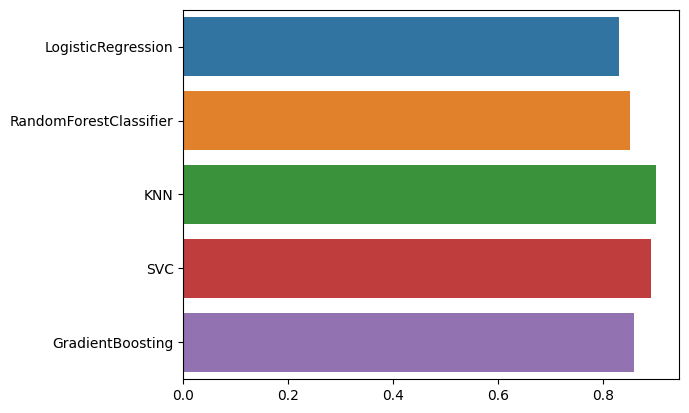

In [17]:
models = ['LogisticRegression', 'RandomForestClassifier', 'KNN', 'SVC', 'GradientBoosting']
models_acc = [lr_acc, rf_acc, knn_acc, svc_acc, gbc_acc]

sns.barplot(y=models, x=models_acc)

In [18]:
#KNN 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_ans = pd.Series(knn.predict(test_data))



In [19]:
result = {'Solution': y_ans, 'Id': [i for i in range(1, 9001)]}
sub = pd.DataFrame(data = result, dtype=np.int64)
sub

,Solution,Id
0,1,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
8995,1,8996
8996,1,8997
8997,1,8998
8998,0,8999


In [20]:
sub.to_csv('out.csv', index=False)